## Final Project Submission

Please fill out:
* Student name: Esra Guzel
* Student pace: Full time
* Scheduled project review date/time:Fri May 22, 2020 3:30pm – 4:15pm Eastern Time - New York
* Instructor name: Abhineet Kulkarni
* Blog post URL:https://esraguzel.github.io/observing_sensitivity_and_specificity_throughout_the_neural_network_models

### Introduction 

In this project, the Chest X-Ray Images (Pneumonia) dataset on Kaggle is chosen to work on. The aim of this project is to predict whether the X-Ray images are belong to a healthy person or a pneumonia patient by applying neural network models. 

### Bussiness Case

In healthcare sector, it is believed that human-caused errors are the primary cause of negative experiences/events. To prevent medical human errors and improve patient safety many approaches and methods developed and combined with different fields such as computer science. 

Like in many fields, deep learning models becomes very useful in healthcare sector by reducing human caused errors, minimizing diagnosis time&costs, lowering medical legal risks and maximizing patient safety. 

### Methodology

In this image classification with deep learning project, 7 different models from a basic neural networks model to pre-trained models are used to explore models performance. Recall, accuracy and f1 score are used for evaluation metrics. As the data is highly imbalanced to increase performance of the last model data augmentation is also applied to the dataset. 

As the models got complicated, it is observed accuracy, sensitivity and specificity scores increased throughout the models. Also, it is noticed that data augmentation lead to rise in both recall scores for each labels and increased model performance. 


In [1]:
# Importing necessary packages and dictionaries

import os, shutil
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation

from keras.optimizers import SGD

from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras.utils import plot_model
from keras import losses
from sklearn.utils import shuffle
from keras import models
from keras import layers
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.initializers import glorot_uniform
from keras.layers import (Activation, BatchNormalization, Conv2D, Dense,
                          Dropout, Flatten, MaxPooling2D)
from keras.losses import binary_crossentropy
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from matplotlib import image

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools
from keras.utils import plot_model
from IPython.display import Image 
import functools
import operator

np.random.seed(123)

Using TensorFlow backend.
/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

## Obtaining the data 

The data has 5860 training images, divided into 3 fold of train, validation and test. The data is also highly imbalanced that number of pneumonia images exceeds the number of normal images nearly 3 times. 

The dataset obtained from Kaggle manually redistributed that train set contains 70%, test and validation and test sets contains 15% of the data and balanced shares of normal and pneumonia images. 

In [2]:
new_dir = 'split/'


In [3]:
train_folder = os.path.join(new_dir, 'train')
test_folder = os.path.join(new_dir, 'test')
val_folder = os.path.join(new_dir, 'val')

## Scrubbing the data 

The images are normalized by dividing into 255 since all pixel values are always between 0 and 255.

In [4]:
# get all the data in the directory split/test (883 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 876) 

# get all the data in the directory split/validation (872 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 877)

# get all the data in the directory split/train (4101 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=4103)  

Found 876 images belonging to 2 classes.
Found 877 images belonging to 2 classes.
Found 4103 images belonging to 2 classes.


In [5]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

##  Exploring the data 

In [6]:
# Exploreing the dataset
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 4103
Number of testing samples: 876
Number of validation samples: 877
train_images shape: (4103, 64, 64, 3)
train_labels shape: (4103, 2)
test_images shape: (876, 64, 64, 3)
test_labels shape: (876, 2)
val_images shape: (877, 64, 64, 3)
val_labels shape: (877, 2)


Label: [0. 1.]


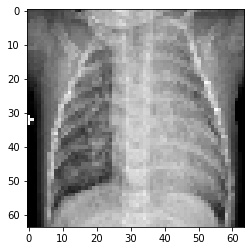

In [7]:
# Sample image
sample_image = train_images[0]
sample_label =train_labels[0]
display(plt.imshow(sample_image));
print('Label: {}'.format(sample_label))

In [8]:
# rescaled image
sample_image

array([[[0.2627451 , 0.2627451 , 0.2627451 ],
        [0.27058825, 0.27058825, 0.27058825],
        [0.28627452, 0.28627452, 0.28627452],
        ...,
        [0.23137257, 0.23137257, 0.23137257],
        [0.2901961 , 0.2901961 , 0.2901961 ],
        [0.2784314 , 0.2784314 , 0.2784314 ]],

       [[0.27450982, 0.27450982, 0.27450982],
        [0.30980393, 0.30980393, 0.30980393],
        [0.31764707, 0.31764707, 0.31764707],
        ...,
        [0.28235295, 0.28235295, 0.28235295],
        [0.3019608 , 0.3019608 , 0.3019608 ],
        [0.3019608 , 0.3019608 , 0.3019608 ]],

       [[0.2627451 , 0.2627451 , 0.2627451 ],
        [0.3019608 , 0.3019608 , 0.3019608 ],
        [0.32941177, 0.32941177, 0.32941177],
        ...,
        [0.37647063, 0.37647063, 0.37647063],
        [0.37647063, 0.37647063, 0.37647063],
        [0.3803922 , 0.3803922 , 0.3803922 ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [9]:
# reshaping the images for test, train and validation sets
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(4103, 12288)
(876, 12288)
(877, 12288)


In [10]:
# reshaping labels
train_y = np.reshape(train_labels[:,0], (4103,1))
test_y = np.reshape(test_labels[:,0], (876,1))
val_y = np.reshape(val_labels[:,0], (877,1))

### Helper functions 

In [11]:
# run this lines to flush py files cache
%reload_ext autoreload
%autoreload 2

# Import helper functions
from helper_functions import visualize_training_results

## Modelling the data

### Baseline Model 

In [12]:
# creating a baseline two layers model
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(12288,))) 
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# defining the optimizer and the learning rate
optimizer = keras.optimizers.Adam(lr=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
# compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                122890    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 122,951
Trainable params: 122,951
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fitting the model
history = model.fit(train_img,
                    train_y,
                    epochs=60,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Train on 4103 samples, validate on 877 samples
Epoch 1/60
4103/4103 [==============================] - 1s 131us/step - loss: 0.5550 - acc: 0.7295 - val_loss: 0.5041 - val_acc: 0.7366
Epoch 2/60
4103/4103 [==============================] - 0s 94us/step - loss: 0.4563 - acc: 0.7653 - val_loss: 0.4334 - val_acc: 0.7674
Epoch 3/60
4103/4103 [==============================] - 0s 103us/step - loss: 0.3995 - acc: 0.8228 - val_loss: 0.3893 - val_acc: 0.8153
Epoch 4/60
4103/4103 [==============================] - 0s 107us/step - loss: 0.3641 - acc: 0.8533 - val_loss: 0.3587 - val_acc: 0.8461
Epoch 5/60
4103/4103 [==============================] - 0s 98us/step - loss: 0.3386 - acc: 0.8684 - val_loss: 0.3332 - val_acc: 0.8757
Epoch 6/60
4103/4103 [==============================] - 0s 97us/step - loss: 0.3179 - acc: 0.8813 - val_loss: 0.3189 - val_acc: 0.8597
Epoch 7/60
4103/4103 [==============================] - 1s 143us/step - loss: 0.3009 - acc: 0.8918 - val_loss: 0.3020 - val_acc: 0.8746
Epoc

In [15]:
results_train = model.evaluate(train_img, train_y)

4103/4103 [==============================] - 0s 42us/step


In [16]:
results_test = model.evaluate(test_img, test_y)

876/876 [==============================] - 0s 36us/step


In [17]:
results_train

[0.14827168009160147, 0.9461369729466245]

In [18]:
results_test

[0.33084244883223757, 0.873287671505044]

In [19]:
# classification report
y_pred = model.predict(test_img)
y_pred = np.rint(y_pred)

print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       640
           1       0.96      0.56      0.70       236

    accuracy                           0.87       876
   macro avg       0.91      0.77      0.81       876
weighted avg       0.88      0.87      0.86       876



While the baseline model has 88% percent accuracy, the recall score for pneumonia is really low. Here it is observed that for medical field accuracy score isn't enough and sometimes misleading. 

While precision is the ratio of correct positive predictions to the total predicted positives, recall is the ratio of correct positive predictions to the total positives. In our case we will be also targeting higher recall scores for both pneumonia and normal cases besides accuracy. 


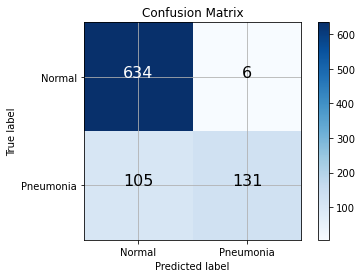

In [20]:
# confusion matrix
class_names = ['Normal','Pneumonia']

y_pred = model.predict(test_img)
y_pred = np.rint(y_pred)
    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(test_y, y_pred)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

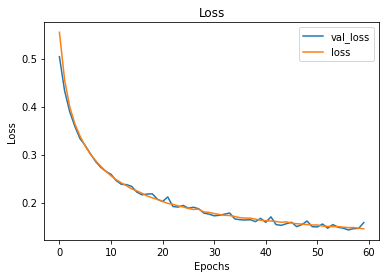

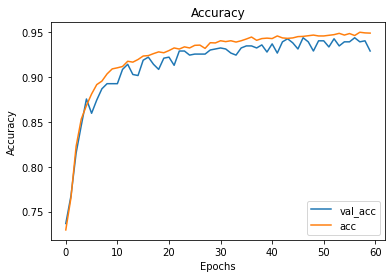

In [22]:
visualize_training_results(history)

### Regularization with dropout

In [23]:
model = models.Sequential()
# Implement dropout to the input layer
# NOTE: This is where you define the number of units in the input layer
model.add(layers.Dropout(0.3, input_shape=(12288,)))

# Add the first hidden layer
model.add(layers.Dense(16, activation='relu'))

# Implement dropout to the first hidden layer 
model.add(layers.Dropout(0.3))

# Add the second hidden layer
model.add(layers.Dense(10, activation='relu'))

# Implement dropout to the second hidden layer 
model.add(layers.Dropout(0.3))


# Add the output layer
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 12288)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                196624    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 196,805
Trainable params: 196,805
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_img,
                    train_y,
                    epochs=80,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Train on 4103 samples, validate on 877 samples
Epoch 1/80
4103/4103 [==============================] - 1s 222us/step - loss: 0.7066 - acc: 0.5515 - val_loss: 0.6928 - val_acc: 0.7298
Epoch 2/80
4103/4103 [==============================] - 1s 165us/step - loss: 0.6926 - acc: 0.7136 - val_loss: 0.6924 - val_acc: 0.7298
Epoch 3/80
4103/4103 [==============================] - 1s 167us/step - loss: 0.6923 - acc: 0.7275 - val_loss: 0.6920 - val_acc: 0.7298
Epoch 4/80
4103/4103 [==============================] - 1s 166us/step - loss: 0.6917 - acc: 0.7265 - val_loss: 0.6916 - val_acc: 0.7298
Epoch 5/80
4103/4103 [==============================] - 1s 161us/step - loss: 0.6906 - acc: 0.7351 - val_loss: 0.6907 - val_acc: 0.7480
Epoch 6/80
4103/4103 [==============================] - 1s 166us/step - loss: 0.6895 - acc: 0.7378 - val_loss: 0.6892 - val_acc: 0.7685
Epoch 7/80
4103/4103 [==============================] - 1s 161us/step - loss: 0.6876 - acc: 0.7443 - val_loss: 0.6879 - val_acc: 0.7811
E

4103/4103 [==============================] - 1s 162us/step - loss: 0.5899 - acc: 0.8789 - val_loss: 0.5803 - val_acc: 0.9293
Epoch 61/80
4103/4103 [==============================] - 1s 161us/step - loss: 0.5898 - acc: 0.8781 - val_loss: 0.5736 - val_acc: 0.9225
Epoch 62/80
4103/4103 [==============================] - 1s 161us/step - loss: 0.5842 - acc: 0.8864 - val_loss: 0.5675 - val_acc: 0.9088
Epoch 63/80
4103/4103 [==============================] - 1s 161us/step - loss: 0.5870 - acc: 0.8774 - val_loss: 0.5692 - val_acc: 0.9190
Epoch 64/80
4103/4103 [==============================] - 1s 160us/step - loss: 0.5806 - acc: 0.8874 - val_loss: 0.5739 - val_acc: 0.9247
Epoch 65/80
4103/4103 [==============================] - 1s 161us/step - loss: 0.5811 - acc: 0.8913 - val_loss: 0.5667 - val_acc: 0.9042
Epoch 66/80
4103/4103 [==============================] - 1s 161us/step - loss: 0.5833 - acc: 0.8901 - val_loss: 0.5654 - val_acc: 0.9225
Epoch 67/80
4103/4103 [==============================

In [25]:
results_train = model.evaluate(train_img, train_y)
results_test = model.evaluate(test_img, test_y)
print(results_train)
print(results_test)

876/876 [==============================] - 0s 44us/step
[0.5413147676232208, 0.9227394589324884]
[0.5766334471092921, 0.8881278538812786]


In [26]:
y_pred = model.predict(test_img)
y_pred = np.rint(y_pred)

print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       640
           1       0.84      0.72      0.78       236

    accuracy                           0.89       876
   macro avg       0.87      0.83      0.85       876
weighted avg       0.89      0.89      0.89       876



After applying dropout no progress observed in terms of recall and accuracy scores. 

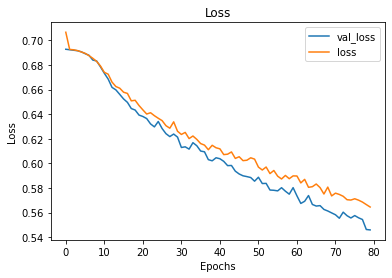

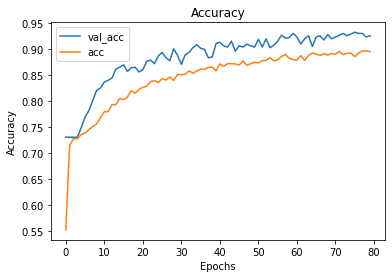

In [27]:
visualize_training_results(history)

###  CNN model

At this point, Convolutional Neural Networks (CNNs) is applied to analyze and classify the images since it can learn both small and larger patterns. First a basic then a more complicated model is applied to compare and analyze models performance. 

In [28]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

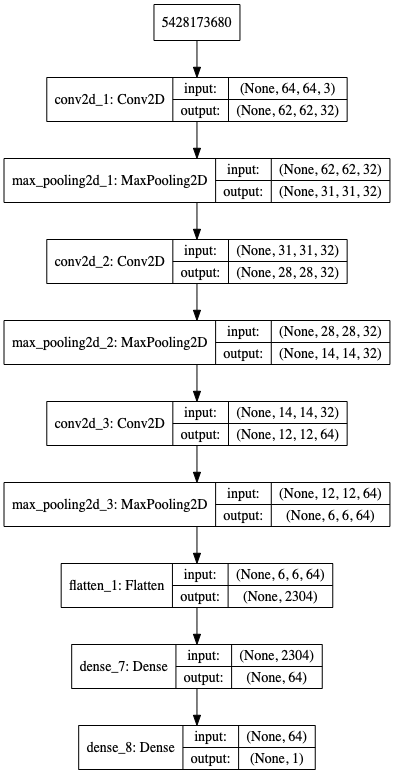

In [29]:
from keras.utils import plot_model
from IPython.display import Image 

file_name = 'cnn1_model.png'
plot_model(model, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(file_name)

In [30]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Train on 4103 samples, validate on 877 samples
Epoch 1/30
4103/4103 [==============================] - 14s 3ms/step - loss: 0.5671 - acc: 0.7295 - val_loss: 0.5443 - val_acc: 0.7298
Epoch 2/30
4103/4103 [==============================] - 14s 3ms/step - loss: 0.5102 - acc: 0.7339 - val_loss: 0.4858 - val_acc: 0.7332
Epoch 3/30
4103/4103 [==============================] - 14s 3ms/step - loss: 0.4393 - acc: 0.7792 - val_loss: 0.4172 - val_acc: 0.8153
Epoch 4/30
4103/4103 [==============================] - 14s 3ms/step - loss: 0.3774 - acc: 0.8460 - val_loss: 0.3668 - val_acc: 0.8609
Epoch 5/30
4103/4103 [==============================] - 14s 3ms/step - loss: 0.3303 - acc: 0.8779 - val_loss: 0.3293 - val_acc: 0.8666
Epoch 6/30
4103/4103 [==============================] - 14s 3ms/step - loss: 0.2987 - acc: 0.8920 - val_loss: 0.3021 - val_acc: 0.8860
Epoch 7/30
4103/4103 [==============================] - 14s 3ms/step - loss: 0.2756 - acc: 0.8981 - val_loss: 0.2916 - val_acc: 0.8860
Epoch 8/

In [31]:
from keras.utils import plot_model
plot_model(model)

In [32]:
results_train = model.evaluate(train_images, train_y)
results_test = model.evaluate(test_images, test_y)
print(results_train)
print(results_test)

876/876 [==============================] - 1s 883us/step
[0.15973113972422207, 0.9432122836948574]
[0.2594991865223401, 0.9041095893132632]


In [33]:
y_pred = model.predict(test_images)
y_pred = np.rint(y_pred)

print(classification_report(test_y, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       640
           1       0.92      0.70      0.80       236

    accuracy                           0.90       876
   macro avg       0.91      0.84      0.87       876
weighted avg       0.91      0.90      0.90       876



With a basic CNN model, sensitivity (recall score for pneumonia patients) increases by 0.3 points while the overall accuracy level remains the same. The model detect the healthy patients by 98%, missed 15 healthy person out of 640. However, out of 236 pneumonia patients the model just predicted 77 correctly. 

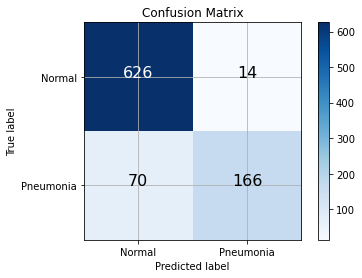

In [34]:
# confusion matrix
import matplotlib.pyplot as plt


class_names = ['Normal','Pneumonia']

y_pred = model.predict(test_images)
y_pred = np.rint(y_pred)
    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(test_y, y_pred)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

### CNN model 2.0 

In [35]:

SEED = 1234
batch_size = 64
v_batch_size = 64
input_size = (32, 32)
input_shape = input_size + (3, )

train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=input_size,
    batch_size=v_batch_size,
    class_mode='binary')

Found 4103 images belonging to 2 classes.
Found 877 images belonging to 2 classes.


In [36]:
# 
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=input_shape, kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.3, seed=SEED))

model.add(Flatten())
model.add(Dense(450, kernel_regularizer=l2(0.01), kernel_initializer=glorot_uniform(seed=SEED)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid', kernel_initializer=glorot_uniform(seed=SEED)))

model.compile(optimizer=SGD(lr=0.01, nesterov=True),
              loss=binary_crossentropy,
              metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 32)        0         
__________

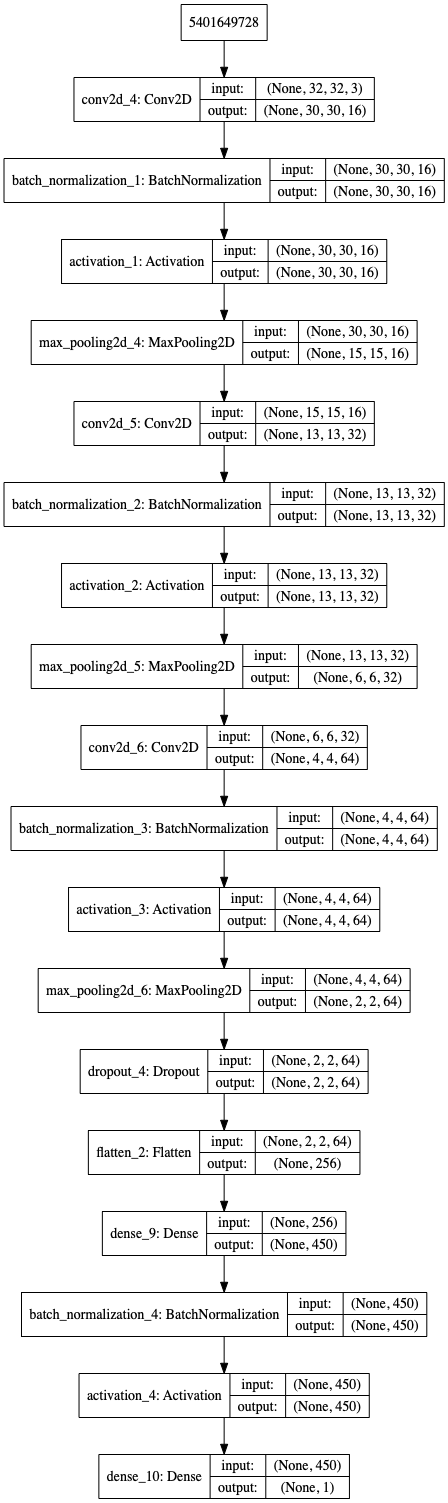

In [37]:
from keras.utils import plot_model
from IPython.display import Image 

file_name = 'cnn_model.png'
plot_model(model, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(file_name)

In [38]:
# Defining callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    mode='auto',
    min_lr=0.0001)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='auto')
model_checkpoint = ModelCheckpoint(
    filepath='weights.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto')


In [39]:
# Fitting the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=50,
    shuffle=False,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // v_batch_size,
    callbacks=[reduce_lr, early_stopping, model_checkpoint])


model.load_weights('weights.h5')
model.save('pneumonia-chest-x-ray-cnn.h5')

Epoch 1/50
64/64 [==============================] - 40s 621ms/step - loss: 4.1804 - acc: 0.8491 - val_loss: 4.1673 - val_acc: 0.8329

Epoch 00001: val_loss improved from inf to 4.16734, saving model to weights.h5
Epoch 2/50
64/64 [==============================] - 44s 684ms/step - loss: 3.9782 - acc: 0.9053 - val_loss: 3.9651 - val_acc: 0.8954

Epoch 00002: val_loss improved from 4.16734 to 3.96510, saving model to weights.h5
Epoch 3/50
64/64 [==============================] - 43s 672ms/step - loss: 3.8650 - acc: 0.9155 - val_loss: 3.7854 - val_acc: 0.9446

Epoch 00003: val_loss improved from 3.96510 to 3.78537, saving model to weights.h5
Epoch 4/50
64/64 [==============================] - 42s 656ms/step - loss: 3.7496 - acc: 0.9265 - val_loss: 3.6791 - val_acc: 0.9336

Epoch 00004: val_loss improved from 3.78537 to 3.67912, saving model to weights.h5
Epoch 5/50
64/64 [==============================] - 216s 3s/step - loss: 3.6324 - acc: 0.9363 - val_loss: 3.7303 - val_acc: 0.8598

Epoc


Epoch 00039: val_loss improved from 1.54934 to 1.51224, saving model to weights.h5
Epoch 40/50
64/64 [==============================] - 38s 601ms/step - loss: 1.4779 - acc: 0.9817 - val_loss: 1.4679 - val_acc: 0.9766

Epoch 00040: val_loss improved from 1.51224 to 1.46789, saving model to weights.h5
Epoch 41/50
64/64 [==============================] - 41s 647ms/step - loss: 1.4287 - acc: 0.9861 - val_loss: 1.4611 - val_acc: 0.9619

Epoch 00041: val_loss improved from 1.46789 to 1.46108, saving model to weights.h5
Epoch 42/50
64/64 [==============================] - 40s 627ms/step - loss: 1.3885 - acc: 0.9858 - val_loss: 1.4064 - val_acc: 0.9705

Epoch 00042: val_loss improved from 1.46108 to 1.40638, saving model to weights.h5
Epoch 43/50
64/64 [==============================] - 41s 645ms/step - loss: 1.3532 - acc: 0.9875 - val_loss: 1.3816 - val_acc: 0.9712

Epoch 00043: val_loss improved from 1.40638 to 1.38156, saving model to weights.h5
Epoch 44/50
64/64 [=========================

In [40]:
# Predict classes for test images 
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=input_size,
    shuffle=False,
    batch_size=v_batch_size,
    class_mode='binary')
cnn_test_score = model.evaluate_generator(
    test_generator,
    steps=test_generator.n // v_batch_size)

print("Test set:\n loss: %.4f, accuracy: %.4f" %
      (cnn_test_score[0], cnn_test_score[1]))

Found 876 images belonging to 2 classes.
Test set:
 loss: 1.4164, accuracy: 0.9050


In [41]:
# printing Classification report
y_true=test_generator.classes

y_pred = model.predict_generator(test_generator)
y_pred = np.rint(y_pred)

print(classification_report(y_true, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.90      0.74      0.81       236
           1       0.91      0.97      0.94       640

    accuracy                           0.91       876
   macro avg       0.91      0.86      0.88       876
weighted avg       0.91      0.91      0.91       876



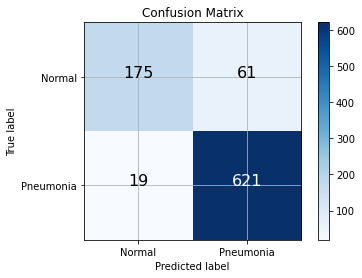

In [42]:
import matplotlib.pyplot as plt

# creating confusion matrix
class_names = ['Normal','Pneumonia']

y_true=test_generator.classes
y_pred = model.predict_generator(test_generator)
y_pred = np.rint(y_pred)
    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

Deeply connected CNN model performed better than the previous one. The recall score for pneumonia increased to 96% and the recall score for normal cases increased to 78%. Still the model predicted 25 false negatives and 51 false negatives. 

The data will be trained with pre-trained models to increase our recall and accuracy rates. 

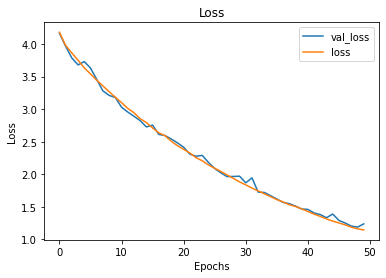

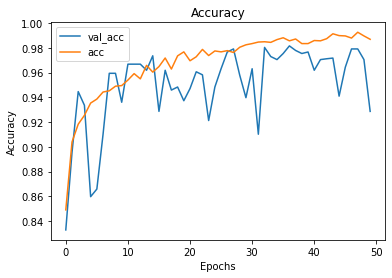

In [43]:
# visualizing training results
visualize_training_results(history)

#### Visualizing intermediate activations

(1, 32, 32, 3)


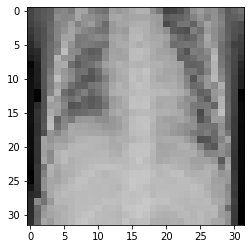

In [60]:
img_path = 'split/train/PNEUMONIA/person1_bacteria_1.jpeg'



from keras.preprocessing import image
# Assign the first image to a keras image object
img = image.load_img(img_path, target_size=(32, 32))
# Create a tensor of the images pixel values
img_tensor = image.img_to_array(img)
# Alter the dimentionality of the array to that of a tensor
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [61]:
img_tensor /= 255.
print(img_tensor.shape)

(1, 32, 32, 3)


In [62]:
from keras import models
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [63]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

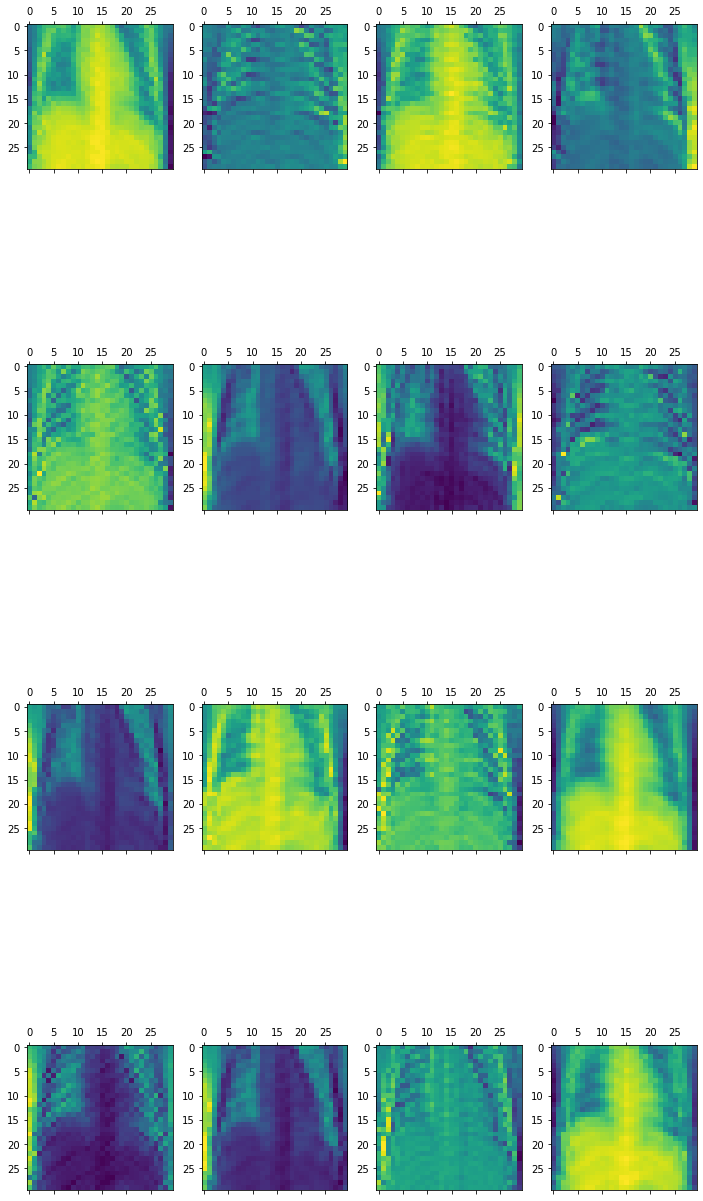

In [66]:
fig, axes = plt.subplots(4, 4, figsize=(12,24))
for i in range(16):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


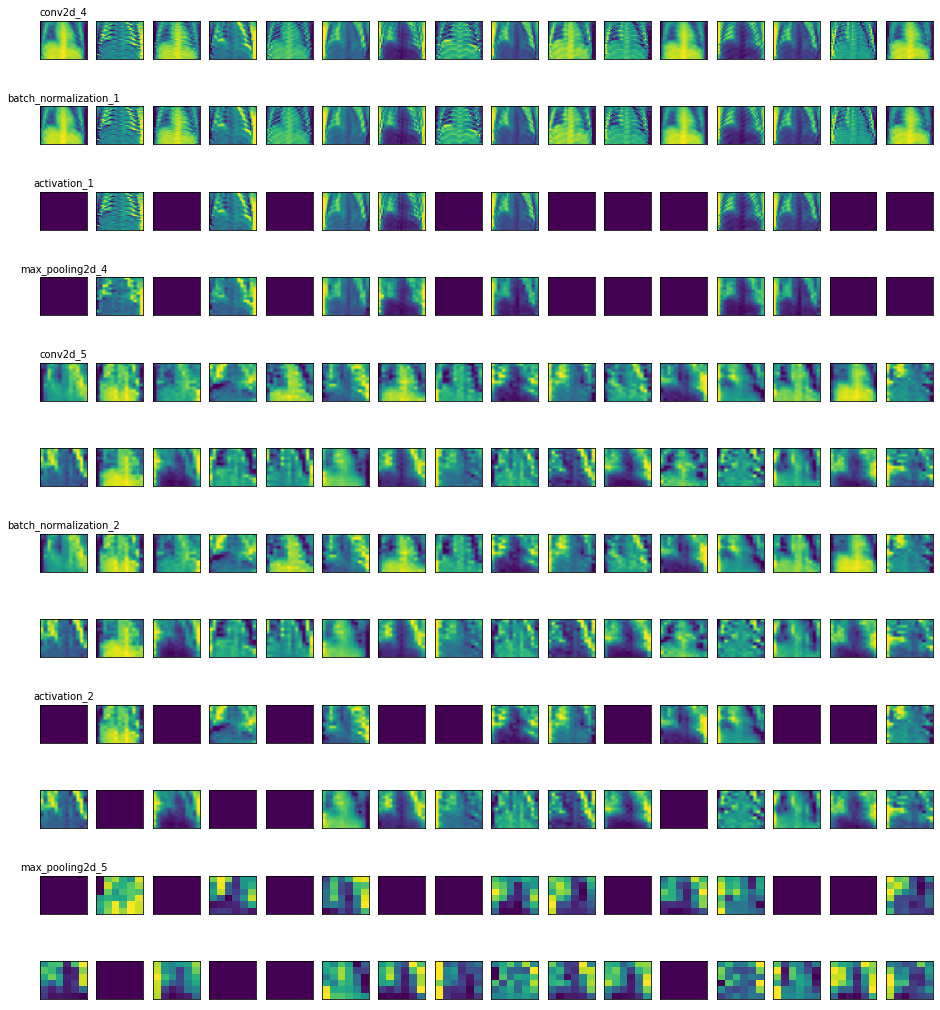

In [67]:
from keras import models
import math 

# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Create a model for displaying the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

# Extract Layer Names for Labelling
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
total_features

n_cols = 16
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                         :, :,
                                         ch_idx]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()

### Transfer learning models

To increase our recall and accuracy rates, pre-trained models Xception and VGG16 will be used with feature extraction. Feature extraction is an important component of a pattern recognition system which identifies key features in the data. Feature extraction transforms input parameter vector into a feature vector and/or reducing its dimensionality. 

#### Xception model

In [68]:
#Defining a model distionary for Xception

model_dict = {}
model_name = "Xception"
input_size = (299, 299)
features_dim = [10, 10, 2048]

model_dict['object'] = Xception
model_dict['input_size'] = input_size
model_dict['input_shape'] = input_size + (3, )
model_dict['features_dim'] = features_dim
model_dict['dense_input_dim'] = functools.reduce(operator.mul, features_dim, 1)
model_dict['weights_filename'] = model_name.lower() + '_weights.h5'
model_dict['model_filename'] = 'pneumonia-chest-x-ray-' + model_name.lower() + '.h5'
model_dict['batch_size'] = 128

In [69]:
# Finding lengths of the data
n_train = train_img.shape[0]
n_test = test_img.shape[0]
n_val = val_img.shape[0]

In [70]:
# Rescaling 
datagen = ImageDataGenerator(rescale=1. / 255)

# Definig a funstion for feature extraction
def extract_features(model_dict, directory, sample_count):
    
    batch_size = model_dict['batch_size']
    shape = tuple([sample_count] + model_dict['features_dim'])
    features = np.zeros(shape=shape)
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=model_dict['input_size'],
        batch_size=batch_size,
        class_mode='binary')
    
    base_model = model_dict['object'](
        input_shape=model_dict['input_shape'],
        weights='imagenet',
        include_top=False)
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features[i * batch_size:(i + 1) * batch_size] = features_batch
        labels[i * batch_size:(i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

# Feature extraction
train_features, train_labels = extract_features(model_dict, train_folder, n_train)
validation_features, validation_labels = extract_features(model_dict, val_folder, n_val)
test_features, test_labels = extract_features(model_dict, test_folder, n_test)

Found 4103 images belonging to 2 classes.
Found 877 images belonging to 2 classes.
Found 876 images belonging to 2 classes.


In [71]:
# Reshape the data
train_features = np.reshape(train_features, (n_train, model_dict['dense_input_dim']))
validation_features = np.reshape(validation_features, (n_val, model_dict['dense_input_dim']))
test_features = np.reshape(test_features, (n_test, model_dict['dense_input_dim']))

In [72]:
# Defining the callbacks
model_checkpoint = ModelCheckpoint(
    filepath=model_dict['weights_filename'],
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='auto')

In [73]:
# Adding layers to the model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=model_dict['dense_input_dim']))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(lr=0.00001),
    loss=binary_crossentropy,
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               104858112 
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 104,858,625
Trainable params: 104,858,625
Non-trainable params: 0
_________________________________________________________________


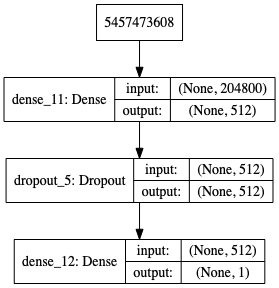

In [74]:
# plotting the model
file_name = 'tl_model.png'
plot_model(model, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(file_name)

In [75]:
# Fitting the model
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    batch_size=model_dict['batch_size'],
    validation_data=(validation_features, validation_labels),
    callbacks=[early_stopping, model_checkpoint])
model.load_weights(model_dict['weights_filename'])
model.save(model_dict['model_filename'])


Train on 4103 samples, validate on 877 samples
Epoch 1/50
4103/4103 [==============================] - 3972s 968ms/step - loss: 0.1716 - acc: 0.9262 - val_loss: 0.0795 - val_acc: 0.9738

Epoch 00001: val_loss improved from inf to 0.07953, saving model to xception_weights.h5
Epoch 2/50
4103/4103 [==============================] - 102s 25ms/step - loss: 0.0783 - acc: 0.9693 - val_loss: 0.0761 - val_acc: 0.9715

Epoch 00002: val_loss improved from 0.07953 to 0.07609, saving model to xception_weights.h5
Epoch 3/50
4103/4103 [==============================] - 1901s 463ms/step - loss: 0.0587 - acc: 0.9800 - val_loss: 0.0634 - val_acc: 0.9783

Epoch 00003: val_loss improved from 0.07609 to 0.06339, saving model to xception_weights.h5
Epoch 4/50
4103/4103 [==============================] - 503s 123ms/step - loss: 0.0393 - acc: 0.9851 - val_loss: 0.0581 - val_acc: 0.9840

Epoch 00004: val_loss improved from 0.06339 to 0.05810, saving model to xception_weights.h5
Epoch 5/50
4103/4103 [==========

In [76]:
t_batch_size = 64

# Predict classes for test images 
test_score = model.evaluate(
    test_features, 
    test_labels,
    steps= n_test // t_batch_size)

test_score

13/13 [==============================] - 42s 3s/step


[0.43911731243133545, 0.8938356041908264]

In [77]:
# Get numerical predictions for test set images 
predictions = model.predict(
    test_features,
    batch_size= n_test // t_batch_size)

# True and predicted labels 
pred_labels = [1 if p > 0.5 else 0 for p in predictions.ravel()]

# Classification metrics
print(classification_report(
        test_labels,
        pred_labels,
        target_names=['normal', 'pneumonia']))

              precision    recall  f1-score   support

      normal       0.97      0.63      0.76       236
   pneumonia       0.88      0.99      0.93       640

    accuracy                           0.89       876
   macro avg       0.92      0.81      0.85       876
weighted avg       0.90      0.89      0.89       876



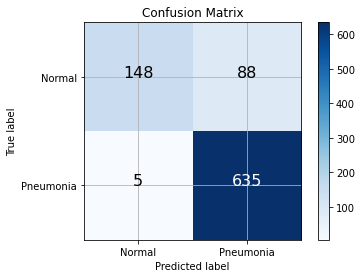

In [78]:
import matplotlib.pyplot as plt

# Creating confusion matrix

    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(test_labels, pred_labels)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

The Xception model has 99% Sensitivity which is a high score to detect pneumonia patients but Specificity is not close to the previous model's performance. 

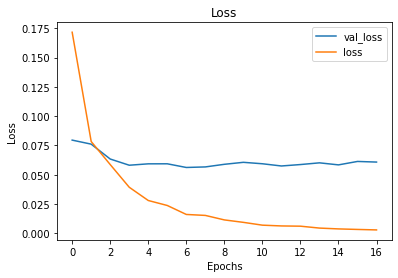

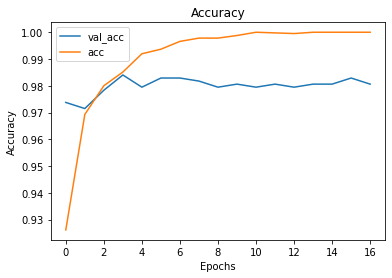

In [79]:
visualize_training_results(history)

#### VGG16 model

In [80]:
import functools
import operator

#Defining a model dictionary for VGG16
model_dict = {}
model_name = "VGG16"
input_size = (224, 224)
features_dim = [7, 7, 512]

model_dict['object'] = VGG16
model_dict['input_size'] = input_size
model_dict['input_shape'] = input_size + (3, )
model_dict['features_dim'] = features_dim
model_dict['dense_input_dim'] = functools.reduce(operator.mul, features_dim, 1)
model_dict['weights_filename'] = model_name.lower() + '_weights.h5'
model_dict['model_filename'] = 'pneumonia-chest-x-ray-' + model_name.lower() + '.h5'
model_dict['batch_size'] = 128

In [81]:
n_train = train_img.shape[0]
n_test = test_img.shape[0]
n_val = val_img.shape[0]

In [82]:
train_features, train_labels = extract_features(model_dict, train_folder, n_train)
validation_features, validation_labels = extract_features(model_dict, val_folder, n_val)
test_features, test_labels = extract_features(model_dict, test_folder, n_test)

Found 4103 images belonging to 2 classes.
Found 877 images belonging to 2 classes.
Found 876 images belonging to 2 classes.


In [83]:
train_features = np.reshape(train_features, (n_train, model_dict['dense_input_dim']))
validation_features = np.reshape(validation_features, (n_val, model_dict['dense_input_dim']))
test_features = np.reshape(test_features, (n_test, model_dict['dense_input_dim']))

In [84]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=model_dict['dense_input_dim']))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(lr=0.00001),
    loss=binary_crossentropy,
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 12,846,081
Trainable params: 12,846,081
Non-trainable params: 0
_________________________________________________________________


In [85]:
model_checkpoint = ModelCheckpoint(
    filepath=model_dict['weights_filename'],
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='auto')

In [86]:
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    batch_size=model_dict['batch_size'],
    validation_data=(validation_features, validation_labels),
    callbacks=[early_stopping, model_checkpoint])
model.load_weights(model_dict['weights_filename'])
model.save(model_dict['model_filename'])

Train on 4103 samples, validate on 877 samples
Epoch 1/50
4103/4103 [==============================] - 10s 2ms/step - loss: 0.5042 - acc: 0.7626 - val_loss: 0.2771 - val_acc: 0.8837

Epoch 00001: val_loss improved from inf to 0.27709, saving model to vgg16_weights.h5
Epoch 2/50
4103/4103 [==============================] - 7s 2ms/step - loss: 0.2542 - acc: 0.8954 - val_loss: 0.1830 - val_acc: 0.9441

Epoch 00002: val_loss improved from 0.27709 to 0.18300, saving model to vgg16_weights.h5
Epoch 3/50
4103/4103 [==============================] - 7s 2ms/step - loss: 0.1966 - acc: 0.9242 - val_loss: 0.1468 - val_acc: 0.9601

Epoch 00003: val_loss improved from 0.18300 to 0.14679, saving model to vgg16_weights.h5
Epoch 4/50
4103/4103 [==============================] - 7s 2ms/step - loss: 0.1595 - acc: 0.9444 - val_loss: 0.1246 - val_acc: 0.9669

Epoch 00004: val_loss improved from 0.14679 to 0.12456, saving model to vgg16_weights.h5
Epoch 5/50
4103/4103 [==============================] - 7s 2

4103/4103 [==============================] - 7s 2ms/step - loss: 0.0410 - acc: 0.9893 - val_loss: 0.0466 - val_acc: 0.9840

Epoch 00039: val_loss improved from 0.04752 to 0.04657, saving model to vgg16_weights.h5
Epoch 40/50
4103/4103 [==============================] - 7s 2ms/step - loss: 0.0387 - acc: 0.9900 - val_loss: 0.0445 - val_acc: 0.9840

Epoch 00040: val_loss improved from 0.04657 to 0.04447, saving model to vgg16_weights.h5
Epoch 41/50
4103/4103 [==============================] - 7s 2ms/step - loss: 0.0394 - acc: 0.9890 - val_loss: 0.0450 - val_acc: 0.9840

Epoch 00041: val_loss did not improve from 0.04447
Epoch 42/50
4103/4103 [==============================] - 7s 2ms/step - loss: 0.0381 - acc: 0.9905 - val_loss: 0.0464 - val_acc: 0.9852

Epoch 00042: val_loss did not improve from 0.04447
Epoch 43/50
4103/4103 [==============================] - 7s 2ms/step - loss: 0.0393 - acc: 0.9893 - val_loss: 0.0434 - val_acc: 0.9840

Epoch 00043: val_loss improved from 0.04447 to 0.043

In [87]:
# Get numerical predictions for test set images 
predictions = model.predict(
    test_features,
    batch_size= n_test // t_batch_size)

# True and predicted labels 
pred_labels = [1 if p > 0.5 else 0 for p in predictions.ravel()]

# Classification metrics
print(classification_report(
        test_labels,
        pred_labels,
        target_names=['normal', 'pneumonia']))

              precision    recall  f1-score   support

      normal       0.98      0.62      0.76       236
   pneumonia       0.88      1.00      0.93       640

    accuracy                           0.89       876
   macro avg       0.93      0.81      0.85       876
weighted avg       0.90      0.89      0.89       876



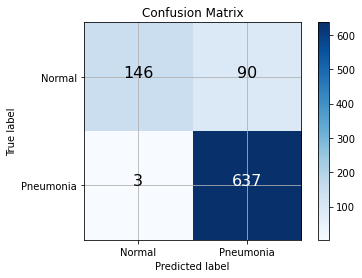

In [88]:
import matplotlib.pyplot as plt


class_names = ['Normal','Pneumonia']

    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(test_labels, pred_labels)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

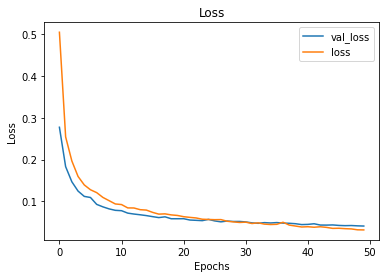

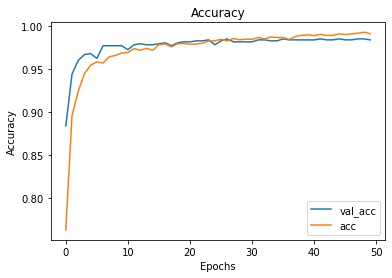

In [89]:
visualize_training_results(history)

#### VGG19 with data augmentation

Until now the deep learning models successfully predicted pneumonia images but couldn't show the same success for the normal images. As the neural network models perform better with more data, data augmentation will be applied to the dataset to oversample both labels.  This time the VGG19 model will be used to train our dataset. 

In [90]:
# importing VGG19
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))

In [91]:
# inspecting the layers
cnn_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

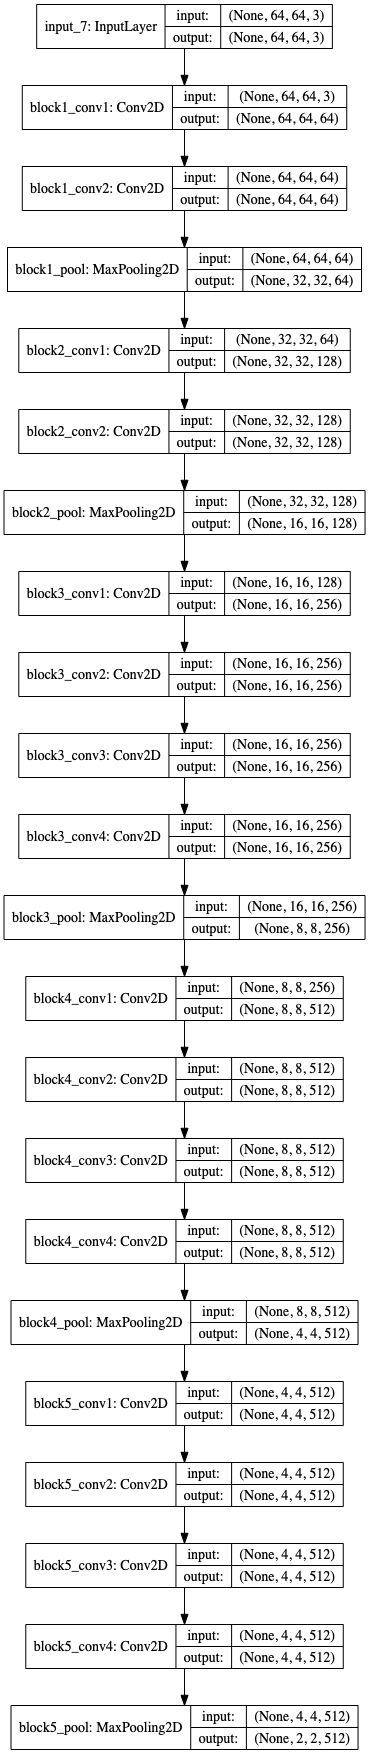

In [92]:
# plotting the layers
file_name = 'cnn_base_model.png'
plot_model(cnn_base, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(file_name)

In [93]:
import functools
import operator

#Defining a model dictionary for VGG16
model_dict = {}
model_name = "VGG19"
input_size = (64, 64)
features_dim = [7, 7, 512]

model_dict['object'] = VGG19
model_dict['input_size'] = input_size
model_dict['input_shape'] = input_size + (3, )
model_dict['features_dim'] = features_dim
model_dict['dense_input_dim'] = functools.reduce(operator.mul, features_dim, 1)
model_dict['weights_filename'] = model_name.lower() + '_weights.h5'
model_dict['model_filename'] = 'pneumonia-chest-x-ray-' + model_name.lower() + '.h5'
model_dict['batch_size'] = 128

In [94]:
# adding layers to out model
model = models.Sequential()
model.add(cnn_base)
model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation="sigmoid"))



In [95]:
# inspecting the summary again
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 2049      
Total params: 20,026,433
Trainable params: 20,026,433
Non-trainable params: 0
_________________________________________________________________


In [96]:
#freezing the cnn_base 
cnn_base.trainable = False

In [97]:
#checking if it is freezed or not
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, you can check how many trainable weights are in the model
print(len(model.trainable_weights))

vgg19 False
flatten_3 True
dropout_7 True
dense_15 True
2


In [98]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

# Get all the data in the directory split/train and reshape them
train_generator = train_datagen.flow_from_directory(train_folder,  
                                                    target_size=(64, 64),  
                                                    batch_size= 876, 
                                                    class_mode= 'binary') 

# Get all the data in the directory split/validation and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,  
                                                                       target_size=(64, 64),  
                                                                       batch_size=877, 
                                                                       class_mode='binary')

# Get all the data in the directory split/test and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,  
                                                                        target_size=(64, 64), 
                                                                        batch_size=4103,
                                                                        class_mode='binary')

test_images, test_labels = next(test_generator)

Found 4103 images belonging to 2 classes.
Found 877 images belonging to 2 classes.
Found 876 images belonging to 2 classes.


In [99]:
# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [100]:
# Defining callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    mode='auto',
    min_lr=0.00001)

model_checkpoint = ModelCheckpoint(
    filepath=model_dict['weights_filename'],
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='auto')

In [101]:
# fitting the model
history = model.fit_generator(train_generator,
                              steps_per_epoch=36,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=10,
                              callbacks=[reduce_lr, early_stopping, model_checkpoint])

Epoch 1/30
36/36 [==============================] - 951s 26s/step - loss: 0.5747 - acc: 0.7259 - val_loss: 0.4040 - val_acc: 0.8472

Epoch 00001: val_loss improved from inf to 0.40395, saving model to vgg19_weights.h5
Epoch 2/30
36/36 [==============================] - 1043s 29s/step - loss: 0.4286 - acc: 0.8064 - val_loss: 0.3615 - val_acc: 0.8404

Epoch 00002: val_loss improved from 0.40395 to 0.36155, saving model to vgg19_weights.h5
Epoch 3/30
36/36 [==============================] - 2143s 60s/step - loss: 0.3844 - acc: 0.8273 - val_loss: 0.3516 - val_acc: 0.8301

Epoch 00003: val_loss improved from 0.36155 to 0.35158, saving model to vgg19_weights.h5
Epoch 4/30
36/36 [==============================] - 867s 24s/step - loss: 0.3658 - acc: 0.8383 - val_loss: 0.3459 - val_acc: 0.8369

Epoch 00004: val_loss improved from 0.35158 to 0.34593, saving model to vgg19_weights.h5
Epoch 5/30
36/36 [==============================] - 975s 27s/step - loss: 0.3476 - acc: 0.8490 - val_loss: 0.3328 

In [102]:
# generating test results
batch_size = 64
v_batch_size = 64
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=input_size,
    shuffle=False,
    batch_size=v_batch_size,
    class_mode='binary')
cnn_test_score = model.evaluate_generator(
    test_generator,
    steps=test_generator.n // v_batch_size)

print("Test set:\n loss: %.4f, accuracy: %.4f" %
      (cnn_test_score[0], cnn_test_score[1]))

Found 876 images belonging to 2 classes.
Test set:
 loss: 0.2956, accuracy: 0.8786


In [103]:
# classification report
y_true=test_generator.classes

y_pred = model.predict_generator(test_generator)
y_pred = np.rint(y_pred)

print(classification_report(y_true, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       236
           1       0.93      0.90      0.92       640

    accuracy                           0.88       876
   macro avg       0.84      0.86      0.85       876
weighted avg       0.88      0.88      0.88       876



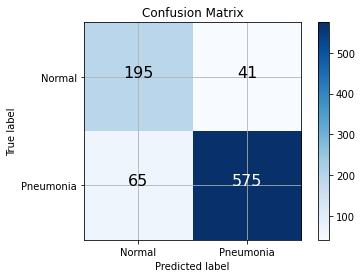

In [104]:
import matplotlib.pyplot as plt

# creating confusion matrix
class_names = ['Normal','Pneumonia']

y_true=test_generator.classes
y_pred = model.predict_generator(test_generator)
y_pred = np.rint(y_pred)
    
plt.grid(b=None)
cmap=plt.cm.Blues  
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.imshow(cnf_matrix, cmap=cmap) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
    
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 fontsize=16,
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    
plt.colorbar()
plt.show()

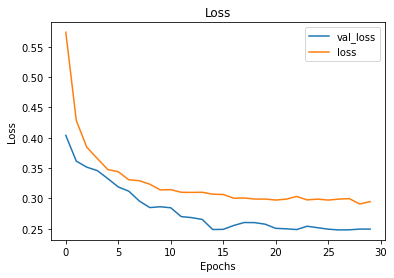

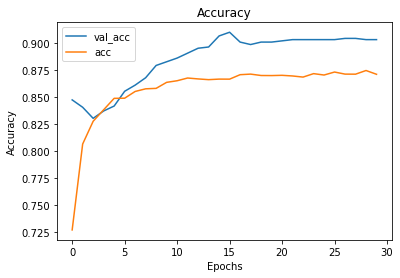

In [105]:
visualize_training_results(history)

## Interpretation of the data 




### Findings



### Recommendations
- The model should be used as a tool by medical experts and specialists which will support their diagnosis and treatment method.
- To reach higher levels of accuracy and recall score oversampling techniques should be used.



### Future Work 
- The Dataset can be enriched, and the target variables can be balanced by oversampling methods. 
- Different pretrained models can be applied to observe accuracy , f1 and recall scores. 
- The model can be trained over to detect the cause of pneumonia (bacteria or virus).


### Conclusion